In [1]:
import pandas as pd
import numpy as np
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
file = '/content/drive/My Drive/VCSproject/fer20131.csv'
df = pd.read_csv(file)
df.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


Text(0.5, 1.0, 'Distribution of emotions,(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprised, 6=Neutral)')

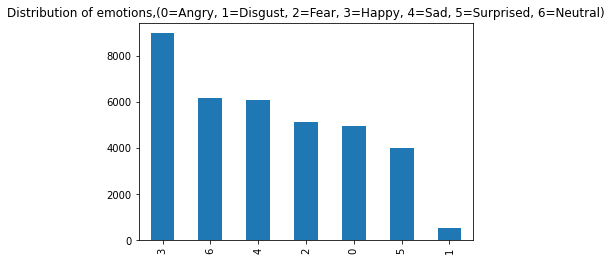

In [4]:
import matplotlib.pyplot as plt
df['emotion'].value_counts().plot(kind='bar')
plt.title("Distribution of emotions,(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprised, 6=Neutral)")

(35887, 3)
(35887, 3)


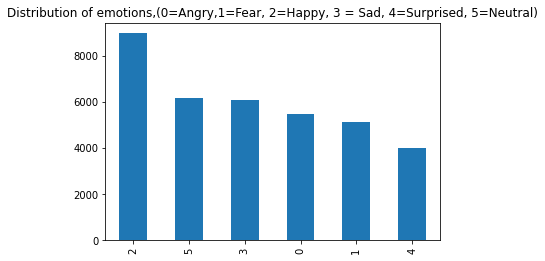

In [5]:
print(df.shape)
df['emotion'] = df['emotion'].map( {0:0, 1:0, 2:1, 3:2, 4:3, 5:4, 6:5} ).astype(int)
df['emotion'].value_counts().plot(kind='bar')
plt.title("Distribution of emotions,(0=Angry,1=Fear, 2=Happy, 3 = Sad, 4=Surprised, 5=Neutral)")
print(df.shape)

(52025, 3)


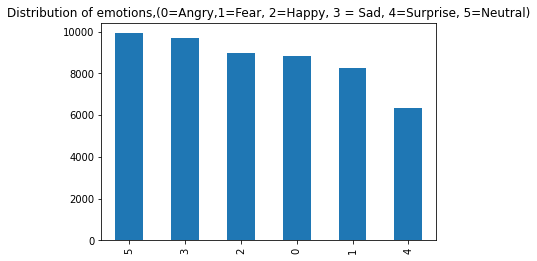

In [6]:
from sklearn.utils import shuffle

#As there are higher number of 'Happy' images, making copies of other images
df_copy = df[df['emotion'] != 2]
df_copy = df_copy[:int(0.6*len(df_copy.index))]
len(df_copy.index)
new_df = shuffle(pd.concat([df,df_copy]))

new_df['emotion'].value_counts().plot(kind='bar')
plt.title("Distribution of emotions,(0=Angry,1=Fear, 2=Happy, 3 = Sad, 4=Surprise, 5=Neutral)")
print(new_df.shape)

In [7]:
# images are 48x48
# N = 35887
X_train, X_test, X_val, y_train, y_test, y_val = [], [], [], [], [], []
#df = df[df.Usage == "Training"]
print(new_df.shape)
#first = True
for index, row in new_df.iterrows():
    if(row[2] == "Training"):
        y_train.append(int(row[0]))
        X_train.append([int(p) for p in row[1].split()])
    elif(row[2] == "PrivateTest"):
        y_test.append(int(row[0]))
        X_test.append([int(p) for p in row[1].split()])
    elif(row[2] == "PublicTest"):
        y_val.append(int(row[0]))
        X_val.append([int(p) for p in row[1].split()])

#standardization
X_train_st = np.array(X_train)
X_test_st = np.array(X_test)
X_val_st = np.array(X_val)
X_train_st = X_train_st.reshape(X_train_st.shape[0], 48, 48, 1)
X_test_st = X_test_st.reshape(X_test_st.shape[0], 48, 48, 1)
X_val_st = X_val_st.reshape(X_val_st.shape[0], 48, 48, 1)
#secondo navarin usare X_train_st per calcolare mean e std
X_train_st = (X_train_st-np.mean(X_train_st, axis=0))/np.std(X_train_st,axis=0)
X_test_st = (X_test_st-np.mean(X_train_st, axis=0))/np.std(X_train_st,axis=0)
X_val_st = (X_val_st-np.mean(X_train_st, axis=0))/np.std(X_train_st,axis=0)


#normalization
X_train_norm = np.array(X_train) / 255.0
X_test_norm = np.array(X_test) / 255.0
X_val_norm = np.array(X_val) / 255.0
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

'''#X = X.astype("float32")
#X /= 255
#Y = to_categorical(Y)
num_class = len(set(Y))
print(num_class)'''

X_train_norm = X_train_norm.reshape(X_train_norm.shape[0], 48, 48, 1)
X_test_norm = X_test_norm.reshape(X_test_norm.shape[0], 48, 48, 1)
X_val_norm = X_val_norm.reshape(X_val_norm.shape[0], 48, 48, 1)


(52025, 3)


In [8]:
y_train = (np.arange(len(set(y_train))) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(len(set(y_test))) == y_test[:, None]).astype(np.float32)
y_val = (np.arange(len(set(y_val))) == y_val[:, None]).astype(np.float32)
print("st shapes")
print(X_train_st.shape)
print(X_test_st.shape)
print(X_val_st.shape)
print("norm shapes")
print(X_train_norm.shape)
print(X_test_norm.shape)
print(X_val_norm.shape)
print("y shapes")
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

st shapes
(44847, 48, 48, 1)
(3589, 48, 48, 1)
(3589, 48, 48, 1)
norm shapes
(44847, 48, 48, 1)
(3589, 48, 48, 1)
(3589, 48, 48, 1)
y shapes
(44847, 6)
(3589, 6)
(3589, 6)


In [9]:
import tensorflow as tf
from tensorflow import Tensor
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model

# vecchia VGG

In [10]:
def old_net(input_layer):
    modelN = keras.Sequential()
    modelN.add(input_layer)
    modelN.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    modelN.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    modelN.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    modelN.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
    modelN.add(keras.layers.Dropout(0.25))#io
    modelN.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    modelN.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    modelN.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    modelN.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
    modelN.add(keras.layers.Dropout(0.4))#io
    modelN.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    modelN.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    modelN.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    modelN.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
    modelN.add(keras.layers.Dropout(0.3))#io
    modelN.add(keras.layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors
    modelN.add(keras.layers.Dense(64, activation='relu'))
    modelN.add(keras.layers.Dense(64, activation='relu'))
    modelN.add(keras.layers.Dense(6, activation='softmax'))
    modelN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return modelN

# VGG-B [24]

In [11]:
def my_VGG(input_layer):
    model = tf.keras.Sequential()
    model.add(input_layer)
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2)))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2)))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2)))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2)))
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(tf.keras.layers.Dense(25, activation='relu')) # era 4096 ma penso sia proporzionale al n.classi => 1000:4096=6:x => x=25
    model.add(tf.keras.layers.Dense(25, activation='relu'))
    
    model.add(tf.keras.layers.Dense(6, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [12]:
# occhio che c'è la L2
def inception(inp,n,name):
  conv_1x1 = tf.keras.layers.Conv2D((3/4)*n, (1,1), padding='same', activation='relu', name=name+'_conv_1x1',kernel_regularizer=tf.keras.regularizers.l2(0.0002))(inp)

  conv_3x3_reduce = tf.keras.layers.Conv2D((1/2)*n, (1,1), padding='same', activation='relu', name=name+'_conv_1x1_3x3_reduce',kernel_regularizer=tf.keras.regularizers.l2(0.0002))(inp)
  conv_3x3_reduce = tf.keras.layers.Conv2D((1/2)*n, (3,3), padding='same', activation='relu', name=name+'_conv_3x3_reduce',kernel_regularizer=tf.keras.regularizers.l2(0.0002))(conv_3x3_reduce) # forse qui è n?

  conv_5x5_reduce = tf.keras.layers.Conv2D((1/8)*n, (1,1), padding='same', activation='relu', name=name+'_conv_1x1_5x5_reduce',kernel_regularizer=tf.keras.regularizers.l2(0.0002))(inp)
  conv_5x5_reduce = tf.keras.layers.Conv2D((1/8)*n, (5,5), padding='same', activation='relu', name=name+'_conv_5x5_reduce',kernel_regularizer=tf.keras.regularizers.l2(0.0002))(conv_5x5_reduce) # forse qui è n?

  conv_5x5 = tf.keras.layers.Conv2D((1/4)*n, (5,5), padding='same', activation='relu', name=name+'_conv_5x5',kernel_regularizer=tf.keras.regularizers.l2(0.0002))(inp)

  pool_proj = tf.keras.layers.MaxPool2D((3,3), strides=(1,1), padding='same', name=name+'_pool_proj')(inp)
  pool_proj = tf.keras.layers.Conv2D((1/4)*n, (1,1), padding='same', activation='relu', name=name+'_conv_1x1_pool_proj',kernel_regularizer=tf.keras.regularizers.l2(0.0002))(pool_proj)

  output = tf.keras.layers.concatenate([conv_1x1, conv_3x3_reduce, conv_5x5_reduce, conv_5x5, pool_proj], axis = 3)
  
  return output

def inception_model(input_layer):
  Inception1 = inception(input_layer,32,"1")
  maxpool = tf.keras.layers.MaxPool2D((3,3), strides=2, padding='same', name='maxpool_1')(Inception1)
  Inception2a = inception(maxpool,64,"2a")
  Inception2b = inception(Inception2a,96,"2b")
  maxpool = tf.keras.layers.MaxPool2D((3,3), strides=2, padding='same', name='maxpool_2')(Inception2b)

  Inception3a = inception(maxpool,128,"3a")
  Inception3b = inception(Inception3a,160,"3b")
  maxpool = tf.keras.layers.MaxPool2D((3,3), strides=2, padding='same', name='maxpool_3')(Inception3b)

  Inception4a = inception(maxpool,192,"4a")
  Inception4b = inception(Inception4a,224,"4b")

  avgpool = tf.keras.layers.AveragePooling2D(pool_size=(3,3), strides=(1,1), name='avgpool')(Inception4b) 
  flatten = tf.keras.layers.Flatten()(avgpool)
  dropout = tf.keras.layers.Dropout(rate=0.4)(flatten)
  output = tf.keras.layers.Dense(6, activation='softmax', name='dense_inception')(dropout)

  return tf.keras.models.Model(input_layer, output, name='inception')

In [13]:
def relu_bn(inputs: tf.Tensor) -> tf.Tensor:
    relu = tf.keras.layers.ReLU()(inputs)
    bn = tf.keras.layers.BatchNormalization()(relu)
    return bn

def residual_block(x: tf.Tensor, downsample: bool, filters: int, kernel_size: int = 3) -> tf.Tensor:
    y = tf.keras.layers.Conv2D(kernel_size=kernel_size, strides= (1 if not downsample else 2), filters=filters, padding="same")(x)
    y = relu_bn(y)
    y = tf.keras.layers.Conv2D(kernel_size=kernel_size, strides=1, filters=filters, padding="same")(y)

    if downsample:
        x = tf.keras.layers.Conv2D(kernel_size=1, strides=2, filters=filters, padding="same")(x)
    out = tf.keras.layers.Add()([x, y])
    out = relu_bn(out)
    return out

def create_res_net(input_layer):
    
    #input_layer = tf.keras.layers.Input(shape=(48,48,1))
    num_filters = 32

    t = tf.keras.layers.BatchNormalization()(input_layer)
    t = tf.keras.layers.Conv2D(kernel_size=3,strides=1,filters=num_filters,padding="same")(t)
    t = relu_bn(t)
    
    #num_blocks_list = [2, 5, 5, 2]
    num_blocks_list = [3,4,6,3]
    for i in range(len(num_blocks_list)):
        num_blocks = num_blocks_list[i]
        for j in range(num_blocks):
            t = residual_block(t, downsample=(j==0 and i!=0), filters=num_filters)
        num_filters *= 2
    
    t = tf.keras.layers.AveragePooling2D(4)(t)
    t = tf.keras.layers.Flatten()(t)
    outputs = tf.keras.layers.Dense(6, activation='softmax')(t)
    
    model = tf.keras.models.Model(input_layer, outputs)

    return model

In [26]:
first_inception = load_model('/content/drive/My Drive/VCSproject/old_model.h5')
#first_inception.summary()
plot_model(first_inception, to_file='first_inception.png', show_shapes=True, show_layer_names=True)
scores = first_inception.evaluate(X_test_norm, y_test, verbose=2)
print("old_model")
print("%s: %.2f%%" % (first_inception.metrics_names[1], scores[1]*100))

first_inception = load_model('/content/drive/My Drive/VCSproject/m_vgg16_ADAM64_512.h5')
#first_inception.summary()
plot_model(first_inception, to_file='first_inception.png', show_shapes=True, show_layer_names=True)
scores = first_inception.evaluate(X_test_norm, y_test, verbose=2)
print("m_vgg16_ADAM64_512")
print("%s: %.2f%%" % (first_inception.metrics_names[1], scores[1]*100))

first_inception = load_model('/content/drive/My Drive/VCSproject/m_inception_v0.h5')
#first_inception.summary()
plot_model(first_inception, to_file='first_inception.png', show_shapes=True, show_layer_names=True)
scores = first_inception.evaluate(X_test_norm, y_test, verbose=2)
print("m_inception_v0")
print("%s: %.2f%%" % (first_inception.metrics_names[1], scores[1]*100))

first_inception = load_model('/content/drive/My Drive/VCSproject/m_resnet_st_v0_150ep_newfrommedium.h5')
#first_inception.summary()
plot_model(first_inception, to_file='first_inception.png', show_shapes=True, show_layer_names=True)
scores = first_inception.evaluate(X_test_norm, y_test, verbose=2)
print("m_resnet_st_v0_150ep_newfrommedium")
print("%s: %.2f%%" % (first_inception.metrics_names[1], scores[1]*100))

113/113 - 0s - loss: 1.5735 - accuracy: 0.6027
old_model
accuracy: 60.27%
113/113 - 1s - loss: 1.8871 - accuracy: 0.6358
m_vgg16_ADAM64_512
accuracy: 63.58%
113/113 - 1s - loss: 5.3476 - accuracy: 0.6361
m_inception_v0
accuracy: 63.61%
113/113 - 1s - loss: 2.9216 - accuracy: 0.6191
m_resnet_st_v0_150ep_newfrommedium
accuracy: 61.91%


In [15]:
model_input = tf.keras.layers.Input(shape=(48,48,1))
print(type(model_input))

old = old_net(model_input)
vgg = my_VGG(model_input)
inception = inception_model(model_input)

m_resnet = create_res_net(model_input)


old.load_weights('/content/drive/My Drive/VCSproject/old_model.h5')
vgg.load_weights('/content/drive/My Drive/VCSproject/m_vgg16_ADAM64_512.h5')
inception.load_weights('/content/drive/My Drive/VCSproject/m_inception_v0.h5')
m_resnet.load_weights('/content/drive/My Drive/VCSproject/m_resnet_st_v0_150ep_newfrommedium.h5')

<class 'tensorflow.python.framework.ops.Tensor'>


old
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)     

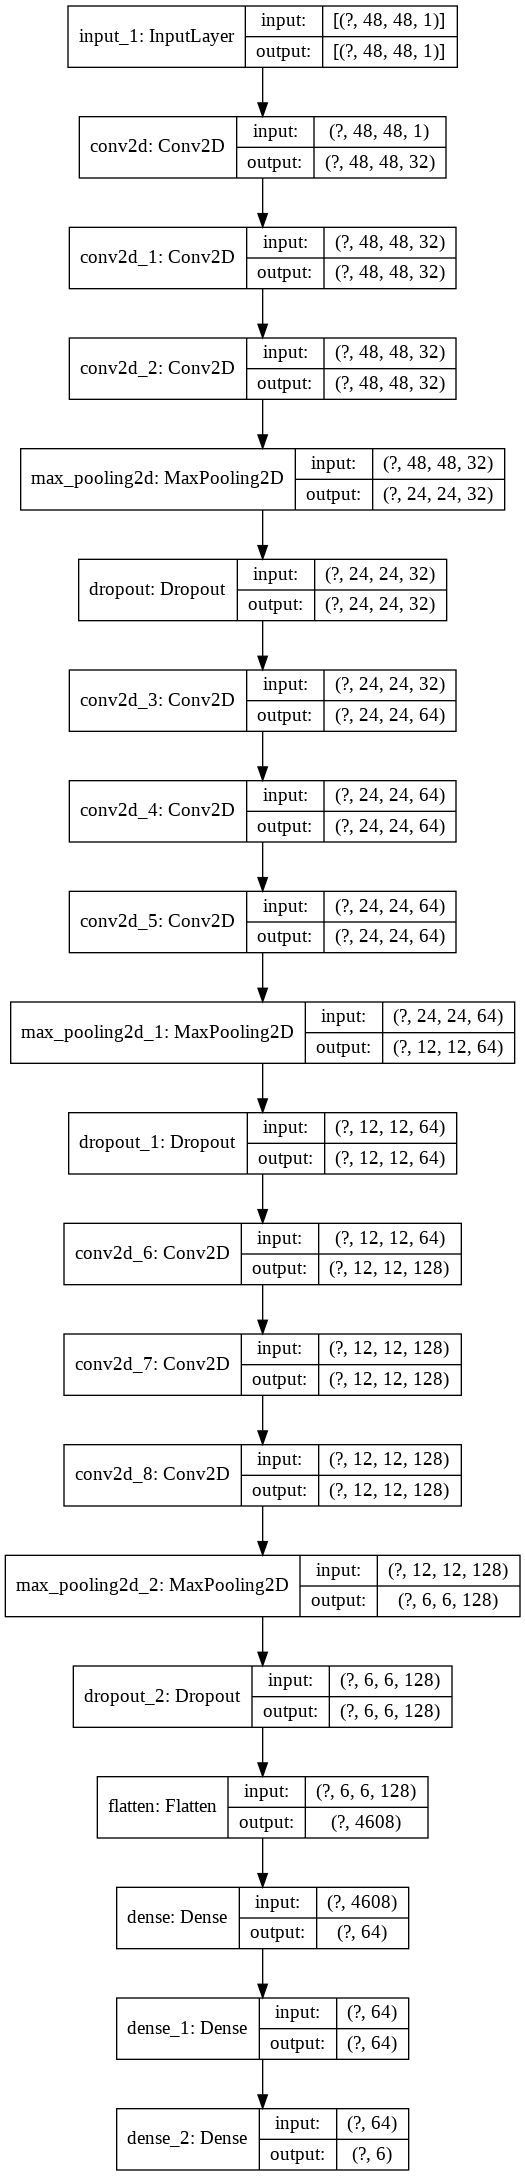

In [16]:
print("old")
old.summary()

plot_model(old, to_file='old.png', show_shapes=True, show_layer_names=True)

vgg
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 128)  

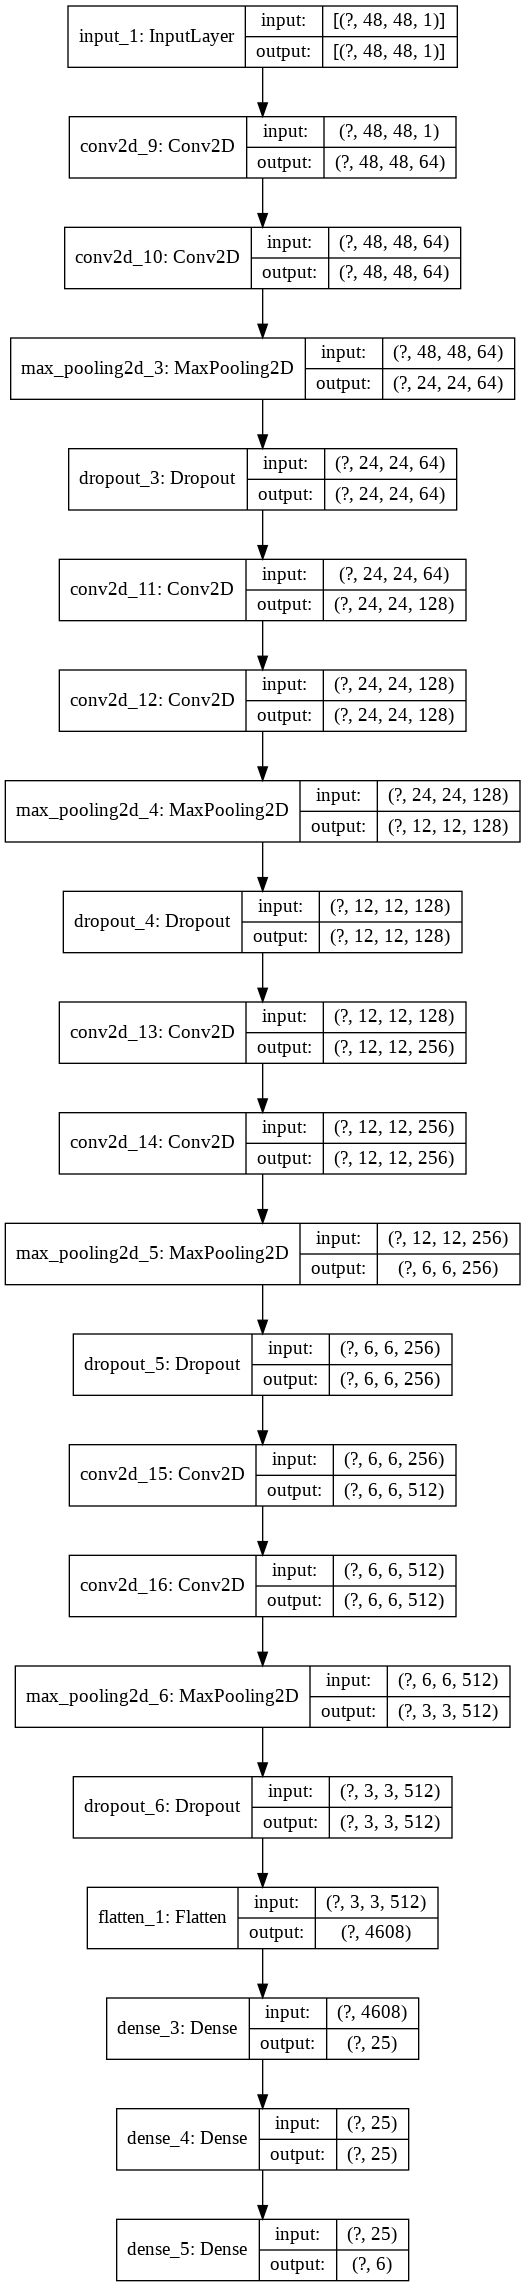

In [17]:
print("vgg")
vgg.summary()

plot_model(vgg, to_file='vgg.png', show_shapes=True, show_layer_names=True)

inception
Model: "inception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 1)]  0                                            
__________________________________________________________________________________________________
1_conv_1x1_3x3_reduce (Conv2D)  (None, 48, 48, 16)   32          input_1[0][0]                    
__________________________________________________________________________________________________
1_conv_1x1_5x5_reduce (Conv2D)  (None, 48, 48, 4)    8           input_1[0][0]                    
__________________________________________________________________________________________________
1_pool_proj (MaxPooling2D)      (None, 48, 48, 1)    0           input_1[0][0]                    
________________________________________________________________________________

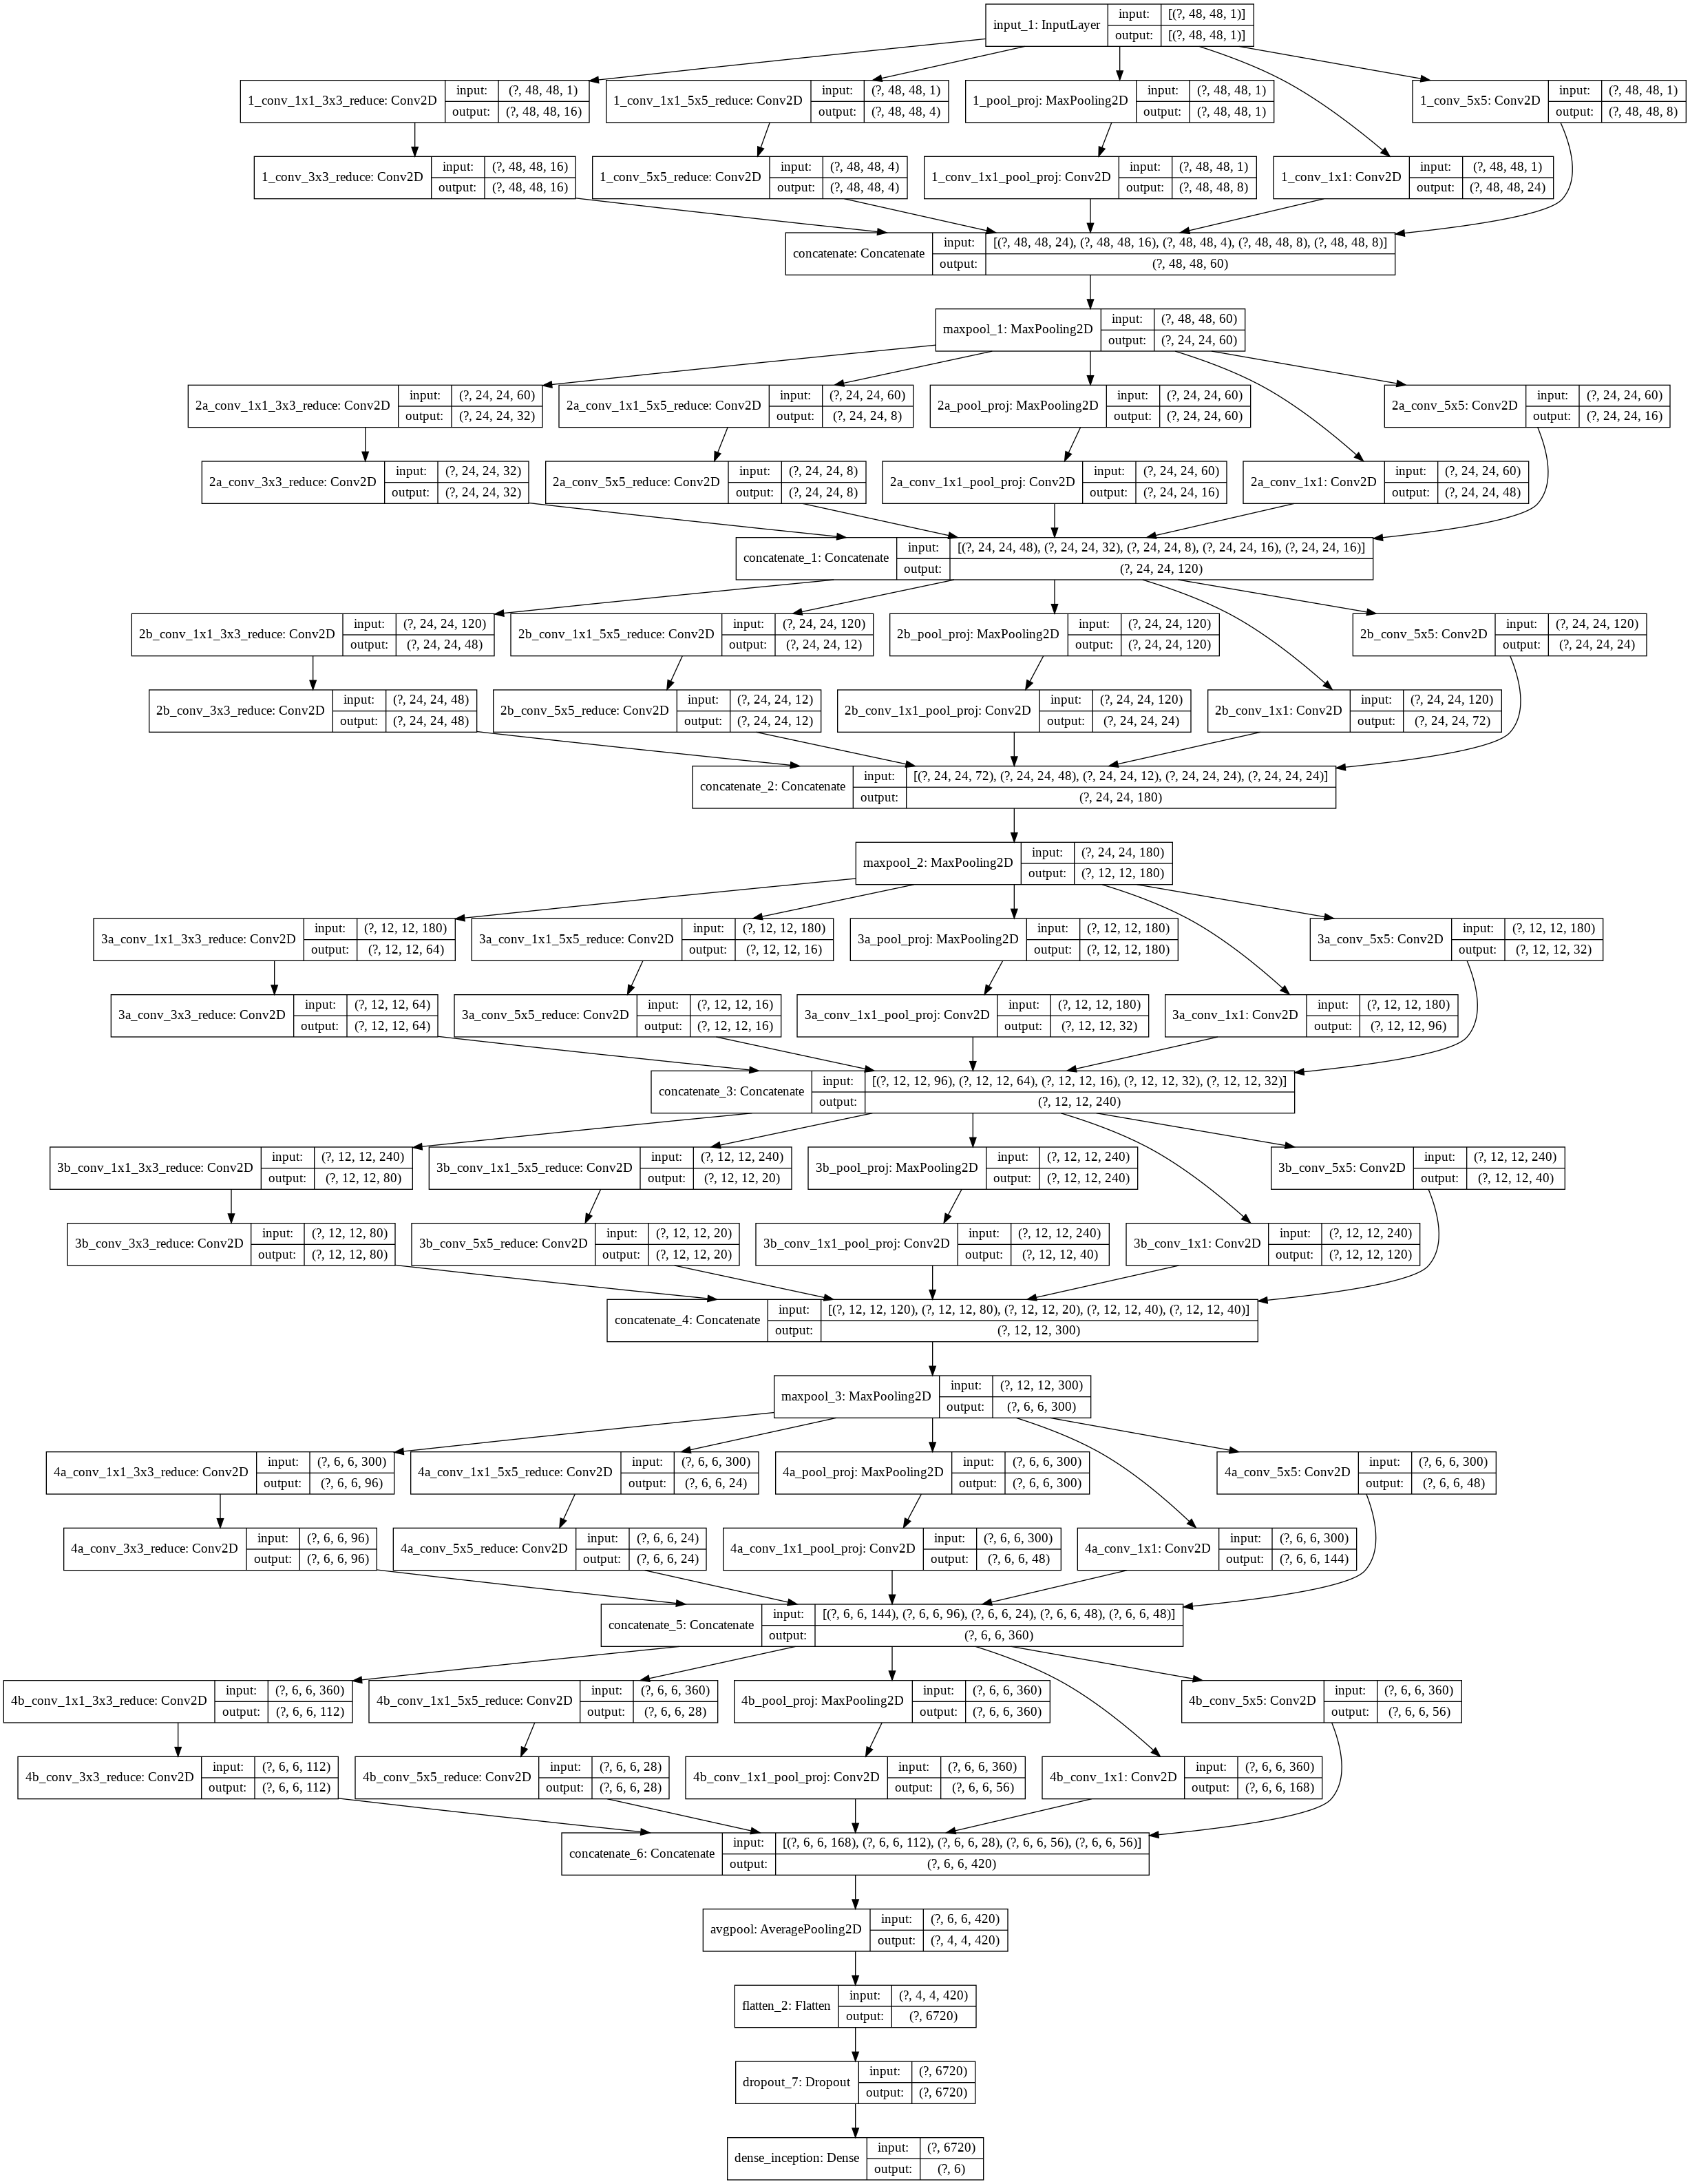

In [18]:
print("inception")
inception.summary()

plot_model(inception, to_file='inception.png', show_shapes=True, show_layer_names=True)

m_resnet
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 1)]  0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 48, 48, 1)    4           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 48, 48, 32)   320         batch_normalization[0][0]        
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 48, 48, 32)   0           conv2d_17[0][0]                  
_____________________________________________________________________________________

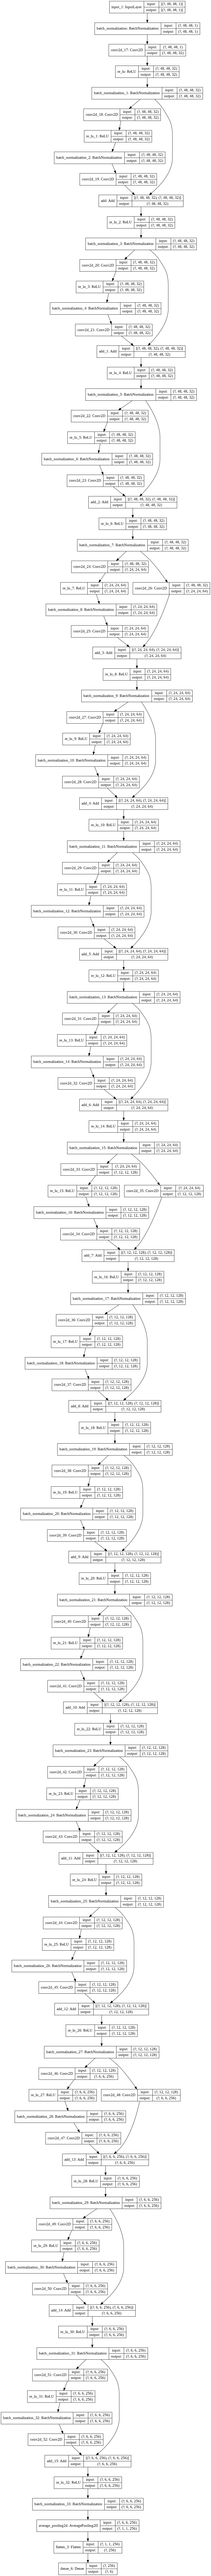

In [19]:
print("m_resnet")
m_resnet.summary()

plot_model(m_resnet, to_file='m_resnet.png', show_shapes=True, show_layer_names=True)

In [20]:
models = [old,vgg,inception,m_resnet]
from sklearn.metrics import classification_report
def recalls(model) -> np.float64:
    pred = model.predict(X_test_norm, batch_size = 32)
    counters = np.zeros(6)
    totals = np.zeros(6)
    for i in range(len(pred)):
        if np.argmax(pred[i]) == np.argmax(y_test[i]):# check if predicted is equal to target
            counters[np.argmax(y_test[i])]+=1
        totals[np.argmax(y_test[i])] += 1
    #target_names = ['Angry 0', 'Fear 1', 'Happy 2', 'Sad 3' ,'Surprised 4' ,'Neutral 5']
    #print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1), target_names=target_names, digits=4))
    result=counters/totals
    return result

def predict_ensamble(X_test): # X_test of shape (n_sample, 48, 48, 6) credo
  c=0
  table = np.empty((len(models),6))
  for model in models:
      #print(model.name)
      result=recalls(model)
      table[c]=result
      c+=1
      #print(result) 
  print("accuracy:",table) # accuracy per ogni classe per ogni modello
  weights = table/np.sum(table.T, axis=-1)# normalizzo 
  print("weights:",weights) # pesi

  c=0
  yhats = np.empty((len(models),X_test.shape[0],6))
  #yhats = np.empty((4,3589))
  for model in models:
    tmp = model.predict(X_test)
    tmp = np.array(tmp)
    #print("tmp",tmp)
    #tmp = tmp*weights[c] #reweighting
    yhats[c] = tmp
    #yhats[c] = np.argmax(tmp,axis=1)
    c+=1

  print("risultati\n",yhats) # ogni riga per modello lunghe 3589 ognuna contiene tutte le y di ogni modello
  for i in range(len(models)):
    yhats[i] = yhats[i]*weights[i]
  print("ripesato\n",yhats)
  media = np.mean(yhats,axis=0)
  print("media.shape",media.shape)
  print("media\n",media) # ogni riga per modello lunghe 3589 ognuna contiene tutte le y di ogni modello
  yhats = yhats.T
  #print(yhats) # ogni colonna per modello lunghe 3589 ognuna contiene tutte le y di ogni modello
  y_ensemble = np.empty((3589,))
  y_ensemble = np.argmax(media, axis=1)
  #print(y_ensemble.shape)
  print("y_ensemble",y_ensemble)
  '''import collections
  for i in range(len(yhats)): # scelgo il risultato con più occorenze tra i 4 modelli
    count = collections.Counter(yhats[i])
    y_ensemble[i] = count.most_common()[0][0]'''
  return y_ensemble

# My ensemle
y_pred = predict_ensamble(X_test_norm)
from sklearn import metrics

y_test_modified = np.argmax(y_test, axis=1)
print("s: %.3f" % (metrics.accuracy_score(y_test_modified, y_pred)*100))

accuracy: [[0.56410256 0.40340909 0.78156997 0.43097643 0.76442308 0.6086262 ]
 [0.51465201 0.51704545 0.7963595  0.503367   0.78125    0.64536741]
 [0.57142857 0.46590909 0.81797497 0.53703704 0.74759615 0.60063898]
 [0.53663004 0.48863636 0.83390216 0.44107744 0.73076923 0.5942492 ]]
weights: [[0.25795645 0.21515152 0.24198662 0.22535211 0.25278219 0.24853229]
 [0.23534338 0.27575758 0.24656569 0.26320423 0.25834658 0.26353555]
 [0.26130653 0.24848485 0.25325819 0.28080986 0.24721781 0.24527071]
 [0.24539363 0.26060606 0.2581895  0.2306338  0.24165342 0.24266145]]
risultati
 [[[2.01173484e-01 4.14115101e-01 1.69177819e-02 4.99232747e-02
   3.16124856e-01 1.74549676e-03]
  [8.79437029e-01 3.94794438e-03 1.26171799e-04 8.88321847e-02
   6.99423808e-09 2.76566334e-02]
  [4.51121151e-01 7.99365528e-03 2.53197941e-05 3.92544508e-01
   4.24772548e-03 1.44067571e-01]
  ...
  [1.44689739e-01 5.80826253e-02 7.69949317e-01 2.04783888e-03
   1.92185864e-02 6.01194007e-03]
  [2.34950781e-01 2.92

In [21]:
from sklearn.metrics import classification_report
def recalls(model) -> np.float64:
    pred = model.predict(X_test_norm, batch_size = 32)
    counters = np.zeros(6)
    totals = np.zeros(6)
    for i in range(len(pred)):
        if np.argmax(pred[i]) == np.argmax(y_test[i]):# check if predicted is equal to target
            counters[np.argmax(y_test[i])]+=1
        totals[np.argmax(y_test[i])] += 1
    #target_names = ['Angry 0', 'Fear 1', 'Happy 2', 'Sad 3' ,'Surprised 4' ,'Neutral 5']
    #print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1), target_names=target_names, digits=4))
    result=counters/totals
    return result

models = [old,vgg,inception,m_resnet]

c=0
table = np.empty((4,6))
for model in models:
    #print(model.name)
    result=recalls(model)
    table[c]=result
    c+=1
    #print(result) 
print("table:",table.T)
weights = table/np.sum(table.T, axis=-1)# normalizzo 
print("weights:",weights)
# reweights
c=0
for model in models:
    #model.outputs[0][0] = model.outputs[0][0]*weights
    tf.math.multiply(model.outputs[0], weights[c])
    c+=1

output = [model.outputs[0] for model in models]
y = tf.keras.layers.Average()(output)

ensemble_model = tf.keras.models.Model(model_input, y, name='ensemble')
ensemble_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])




table: [[0.56410256 0.51465201 0.57142857 0.53663004]
 [0.40340909 0.51704545 0.46590909 0.48863636]
 [0.78156997 0.7963595  0.81797497 0.83390216]
 [0.43097643 0.503367   0.53703704 0.44107744]
 [0.76442308 0.78125    0.74759615 0.73076923]
 [0.6086262  0.64536741 0.60063898 0.5942492 ]]
weights: [[0.25795645 0.21515152 0.24198662 0.22535211 0.25278219 0.24853229]
 [0.23534338 0.27575758 0.24656569 0.26320423 0.25834658 0.26353555]
 [0.26130653 0.24848485 0.25325819 0.28080986 0.24721781 0.24527071]
 [0.24539363 0.26060606 0.2581895  0.2306338  0.24165342 0.24266145]]


# Test

In [22]:
'''first_inception = load_model('/content/drive/My Drive/m_vgg16_ADAM64_512.h5')
first_inception.summary()
plot_model(first_inception, to_file='first_inception.png', show_shapes=True, show_layer_names=True)'''
scores = ensemble_model.evaluate(X_test_norm, y_test, verbose=2)
print("Result")
print("%s: %.2f%%" % (ensemble_model.metrics_names[1], scores[1]*100))
'''from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))'''

113/113 - 3s - loss: 5.1498 - accuracy: 0.6768
Result
accuracy: 67.68%


'from sklearn.metrics import classification_report\nprint(classification_report(Y_test, y_pred))'